#Practica de redes neuronales con Tensorflow

###En esta actividad se utiliza la biblioteca libre para machine learning Scikit. Se utiliza la base de datos iris que contiene información de tres tipos de flores distintas. Se hara una particion de la base de datos para los datos de entrenamiento, prueba, validacion cruzada y metricas para probar la eficiencia de los algoritmos

### Se realizan los imports
#### se importa la biblioteca Tensorflow y Keras
#### Se importa numpy para manejo de datos y matplotlib para grafica
#### y se imprime la versión de tensorflow

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


#### Ahora se importa el conjunto de datos "Fashion", el cual contiene 70000 imagenes en grises de 10 categorias

In [4]:
#Importar el conjunto de datos Fashion MNIST
fashion_mnist = keras.datasets.fashion_mnist

#Cargar el conjunto de datos, 
#Las imagenes y etiquetas que se usarán para el entrenamiento estan en (train_images, train_labels)
#Las imagenes y etiquetas que se usarán para la prueba estan en ((test_images, test_labels)
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#### cada una de estas imagenes esta mapeada a solo una etiqueta y se guarda en la siguiente lista:

In [5]:
class_names = ['Blusa/Camiseta', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo',
               'Sandalias', 'Camisa', 'Tenis', 'Bolsa', 'Bota']

#### Ahora se realizara una exploracion de los datos, la siguiente funcion enseña que hay 60000 imagenes en los datos de entrenamiento

In [6]:
#Obtener la forma del arreglo numpy con las imágenes de entrenamiento
train_images.shape

(60000, 28, 28)

#### De la misma forma, hay 60,000 etiquetas en el conjunto de entrenamiento

In [7]:
#Obtener la cantidad de elementos en el arreglo numpy con las etiquetas de entrenamiento 
len(train_labels)

60000

#### cada etiqueda seá un valor entero entre 0-9

In [8]:
#Mostrar el arreglo de etiquetas
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

#### Hay 10,000 imágenes en el conjunto de datos de prueba, cada imagen se representa con 28x28 pixeles.

In [9]:
#Obtener la forma del arreglo numpy con las imágenes de prueba
test_images.shape

(10000, 28, 28)

#### hay 10,000 etiquetas en el conjunto de prueba

In [10]:
#Obtener la cantidad de elementos en el arreglo numpy con las etiquetas de prueba 
len(test_labels)

10000

### Ahora se preprocesan los datos

#### Ahora los datos se deben preprocesar antes de entrenar a la red neuronal, se inspecciona la primer imagen en los datos de entrenamiento , para ver que cada valor de pixel esta en el rango  de 0 a 255

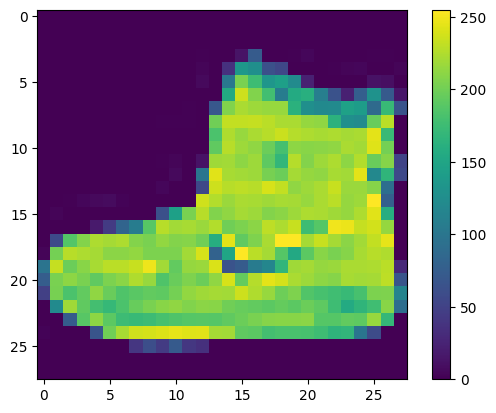

In [11]:
#Mostrar la primer imagen
plt.figure()
plt.imshow(train_images[0])
#Colocar una barra de colores que indica los valores de los pixeles
plt.colorbar()
plt.grid(False)
plt.show()

#### se escalan los valores a un rango de 0 a 1 antes de introducir los datos al modelo de la red neuronal y se divide el valor sobre 255

In [12]:
#Se divide el conjunto de entrenamiento sobre 255
train_images = train_images / 255.0
#Se divide el conjunto de prueba sobre 255
test_images = test_images / 255.0

#### Se despliegan las primeras 25 imagenes del conjunto de entrenamiento y el nombre de su clase debajo de cada imagen, con esto se verifica que los datos esten de una forma correcta y ya se pueda construir y entrenar una red

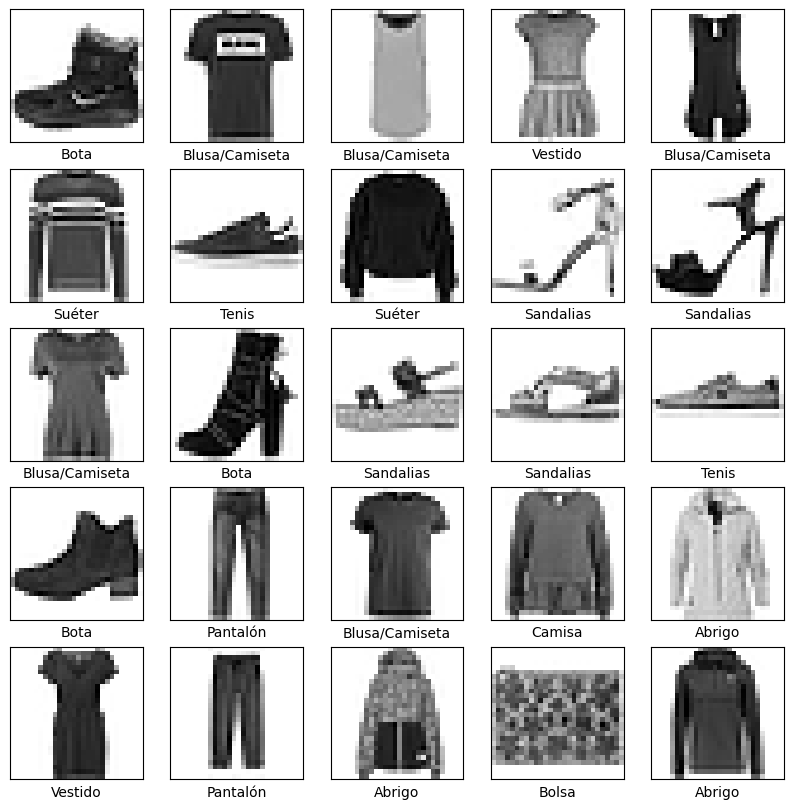

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    #Grafica en la subgráfica i 
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # Grafica la imagen i
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    #Incluye la etitqueta de la imagen 1
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Ahora se construye el modelo de redes neuronales

#### Se construye la primera capa en esta red y con esta las siguientes capas, las capas extraen las representaciones de los datos con los que se les administra

In [14]:
#Se definen las capas
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

### Compilar el modelo

#### ahora se realizan unos pequeños ajustes más antes de que el modelo se entrene:
##### Loss: indica que tan bueno es el modelo durante el entrenamiento
##### optimizer: asi es como el modelo se actualiza basado en los datos y ve como es la funcion loss
##### Metrics: con este se monitorean los pasos del entrenamiento y la prueba

In [15]:
#Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Entrenar el modelo
##### Se llama al metodo model.fit de forma que el modelo se ajusta a datos de entrenamiento

In [16]:
#Ajuste del modelo a los datos de entrenamiento
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5048 - accuracy: 0.8233
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3760 - accuracy: 0.8642
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3387 - accuracy: 0.8752
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3146 - accuracy: 0.8838
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2959 - accuracy: 0.8904


### Evaluar la exactitud
#### Ahora se compara el desempeño del modelo en los datos de prueba

In [17]:
#Evaluar el modelo en los datos de prueba, la pérdida (loss) se almacena en test_loss, la exactitud en test_acc
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3456 - accuracy: 0.8755
Test accuracy: 0.8755000233650208


### Hacer predicciones
#### Con el modelo entrenado se pueden realizar predicciones sobre algunas imagenes, revisaremos la primera prediccion

In [18]:
#Predecir sobre las imagenes de prueba
predictions = model.predict(test_images)

predictions[0]

313/313 [==============================] - 1s 2ms/step


array([1.2129151e-06, 2.3059585e-09, 1.3691171e-06, 4.0179091e-09,
       3.2270256e-07, 1.8323200e-02, 8.3741310e-07, 6.4642645e-02,
       6.8689974e-06, 9.1702360e-01], dtype=float32)

#### Verificaremos cual es la etiqueta que cuenta con el valor de confianza mas alto
##### Al obtener el valor de la bota o 9, comparamos estos valores que ya conocemos de las etiquedas de prueba para revisar si concuerdan

In [19]:
#Encotrar la etiqueta con el valor más alto
np.argmax(predictions[0])

test_labels[0]

9

##### Procedemos a graficar para observar las 10 primeras predicciones

In [20]:
#Función para graficar la imagen predicha
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
    #Si hay una discrepancia entre la clase predicha y la correcta entonces el color es rojo, si todo esta correcto es azúl.
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  #Coloca el texto con el nombre de la clase y la confianza de predicción
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
#Función para graficar el arreglo de predicciones
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
    #Si hay una discrepancia entre la clase predicha y la correcta entonces el color es rojo, si todo esta correcto es azúl.

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

#### Observaremos la imagen 0 y su prediccion con el arreglo de predicciones

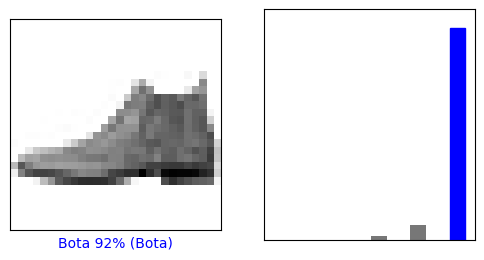

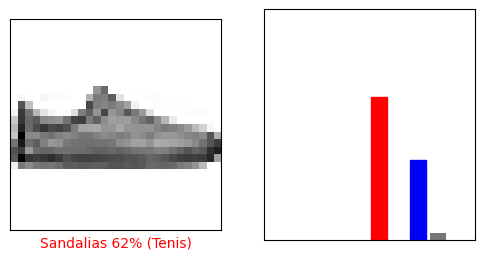

In [21]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
#graficar la imagen predicha
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
#graficar el arreglo de predicciones
plot_value_array(i, predictions,  test_labels)
plt.show()


i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
#graficar la imagen predicha
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
#graficar el arreglo de predicciones
plot_value_array(i, predictions,  test_labels)
plt.show()

##### Ahora graficaremos varias imagenes con su respectiva prediccion, predicciones correctas en azul y las incorrectas en rojo, con su porcentaje para la etiqueta predicha

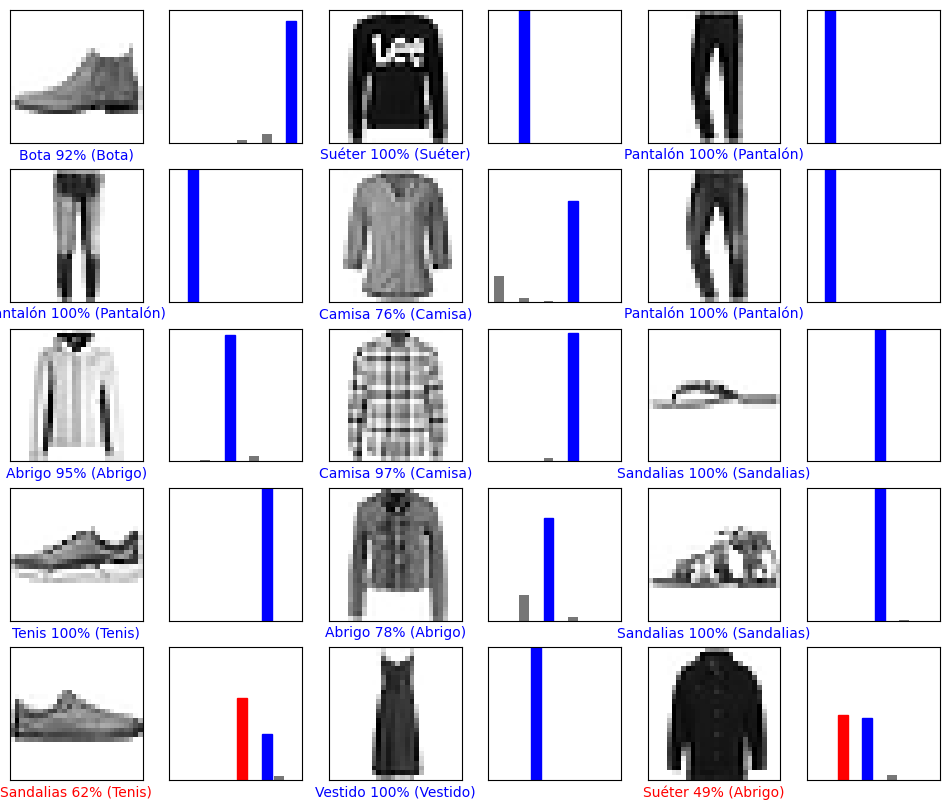

In [22]:
# Graficar las primeras X imagenes de prueba, su etiqueta predicha y la verdadera etiqueta
# Las predicciones correctas están en azúl, las incorrectas en rojo
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

##### Ahora usamos el modelo para predecir sobre una imagen sencilla

In [23]:
# Toma una imagen del conjunto de datos de prueba
img = test_images[0]

print(img.shape)

(28, 28)


##### Los modelos tf.keras se optimizan para predicciones en lotes o colecciones de una sola vez.

In [24]:
# Agrega la imagen a un lote en donde es la única imagen
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


##### Ahora se predice la imagen

1/1 [==============================] - 0s 48ms/step
[[1.2129104e-06 2.3059630e-09 1.3691144e-06 4.0179091e-09 3.2270194e-07
  1.8323168e-02 8.3741310e-07 6.4642593e-02 6.8689847e-06 9.1702360e-01]]


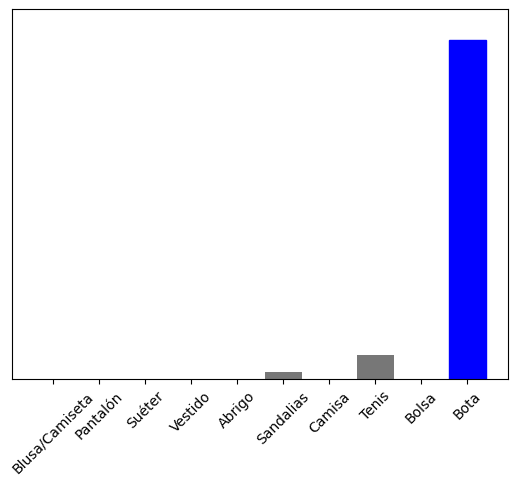

In [25]:
predictions_single = model.predict(img)

print(predictions_single)

#Grafica las predicciones
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

##### este nos regresa una lista de listas, una para cada imagen en el lote de datos

In [26]:
prediction_result = np.argmax(predictions_single[0])
print(prediction_result)

9


##### Generandonos una respuesta de prediccion que dice que es 9 o bota.